# Input and Output in Python, Formatting of Strings & Dates

## Libraries and settings

In [3]:
%pip install pytz folium pandas bs4 reportlab

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Libraries

import os
import re
import pytz
import json
import folium
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date
from datetime import time

from zipfile import ZipFile
from bs4 import BeautifulSoup

from PyPDF2 import PdfReader

from reportlab.lib.units import inch
from reportlab.lib.colors import blue
from reportlab.lib.pagesizes import LETTER
from reportlab.pdfgen.canvas import Canvas

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

c:\Users\Phil\Documents\GitHub\Ersatzprüfung\data_ingestion\01_Input_Output_and_Formatting_Python


## Read & write data from/to a database
Most data driven companies store their data in database management system. <b style="color:yellowgreen">SQLite</b> is a lightweight relational database management system (RDBMS). With python you can connect to a SQLite DB and make requests using SQL.

### Write data to a database

In [5]:
# Create e new db
conn = sqlite3.connect('data/example_sqlite.db')

# Close connection to db
conn.close()

In [6]:
# Open connection to db
conn = sqlite3.connect('data/example_sqlite.db')

# Define variables and data types for the (empty) table
conn.execute('''CREATE TABLE IF NOT EXISTS COMPANY
             (ID INT PRIMARY KEY     NOT NULL,
             NAME           TEXT    NOT NULL,
             AGE            INT     NOT NULL,
             CITY        CHAR(50),
             SALARY         REAL);''')

# Read data from a file and write to data frame
data = pd.read_excel("data/db_data.xlsx", sheet_name = "Sheet1")
print(data)

# Write data to the data base table named 'COMPANY'
data.to_sql('COMPANY', conn, if_exists='replace')

# Commit the changes to the table
conn.commit()

# Close connection to db
conn.close()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

### Query the database using SQL and write result to a pandas data frame 

In [ ]:
# Connection to db
conn = sqlite3.connect("data/example_sqlite.db")

# Read data
df_sub = pd.read_sql("SELECT * FROM COMPANY WHERE AGE <= 26", 
                     con=conn,
                     index_col=['index'])
print(df_sub)
    
# Close connection to db
conn.close()

        NAME  AGE    CITY  SALARY
index                            
0      Peter   25  Berlin   85000
2       Anne   24  Zürich  125000
5        Sue   26  London   95000


## Read & write data from/to files

### Common data/file formats

Data formats in information technology may refer to:

- Data type, constraint placed upon the interpretation of data in a type system
- Signal (electrical engineering), a format for signal data used in signal processing
- Recording format, a format for encoding data for storage on a storage medium
- <b style="color:yellowgreen">File format, a format for encoding data for storage in a computer file</b>
- Container format (digital), a format for encoding data for storage by means of a standardized audio/video codecs file format
- Content format, a format for representing media content as data
- Audio format, a format for encoded sound data
- Video format, a format for encoded video data

Wikipedia: https://en.wikipedia.org/wiki/Data_format

This section provides common <b style="color:yellowgreen">file formats</b> a data scientist or a data engineer must be aware of. Later, we’ll see how to read these file formats in Python.

List with common file formats explained in this notebook:
- CSV
- TXT
- JSON
- XML
- HTML
- ZIP
- XLSX
- PDF
- Image files (e.g. JPEG)

### CSV (comma separated value)

- A comma-separated values (CSV) file is a delimited text file.
- Each line of the file is a data record.
- Each record consists of one or more fields, separated by a separator (default = comma).
- The use of the comma as a field separator is the source of the name for this file format.
- The seperator can also be user-defined, e.g. you can also use a semicolon instead of a comma.
- A CSV file typically stores tabular data (numbers and text).

In [ ]:
# Read data from .csv-file using pandas
data = pd.read_csv("data/example.csv", sep=";")

# Print the header info of data (first five rows)
print(data.head(5))

# Write data to csv
data.to_csv("data/example_write.csv", sep=";")

   chicken_id       weight              breed  eggs_per_year
0           1  2728.854920  New Hampshire Red            158
1           2  2323.761365         Australorp            273
2           3  2635.062034  New Hampshire Red            153
3           4  2603.985152      Plymouth Rock            268
4           5  3079.394487         Australorp            360


### TXT (plain text)

- In Plain Text file format, everything is written in plain text
- Usually, this text is in unstructured form and there is no meta-data associated with it
- The TXT file format can easily be read by any program

In [ ]:
# Open a connection to the text-file
text_file = open("data/example.txt", 
                 "r", 
                 encoding='utf-8')

# Read data from .txt file
lines = text_file.read()

# Show type
print(type(lines))

# Print the data
print(lines)

<class 'str'>
Dorothy lived in the midst of the great Kansas prairies, with Uncle Henry, who was a farmer, and Aunt Em, who was the farmer’s wife. Their house was small, for the lumber to build it had to be carried by wagon many miles. There were four walls, a floor and a roof, which made one room; and this room contained a rusty looking cookstove, a cupboard for the dishes, a table, three or four chairs, and the beds. Uncle Henry and Aunt Em had a big bed in one corner, and Dorothy a little bed in another corner. There was no garret at all, and no cellar—except a small hole dug in the ground, called a cyclone cellar, where the family could go in case one of those great whirlwinds arose, mighty enough to crush any building in its path. It was reached by a trap door in the middle of the floor, from which a ladder led down into the small, dark hole.


In [ ]:
# Write data to .txt
lines = ['Dorothy lived in the midst of the great Kansas prairies', 
         'with Uncle Henry, who was a farmer ...']

with open('data/example_write.txt', 'w') as f:
    f.writelines(lines)
    
# Check whether file exists
files = [f for f in os.listdir('data') if re.match('example_write.txt', f)]
print(files)

['example_write.txt']


### JSON (JavaScript Object Notation)

- JSON is a syntax for storing and exchanging data
- JSON is text, written with JavaScript object notation

In [ ]:
# Read data
with open('data/example.json', 'r') as f:
    data = json.load(f)
print(data)

# Read data to a data frame using the pandas library
data = pd.read_json("data/example.json")

# Print the data
print(data)

{'firstName': 'John', 'lastName': 'Smith', 'age': 27, 'address': {'streetAddress': '21 2nd Street', 'city': 'New York', 'state': 'NY', 'postalCode': '10021-3100'}}
              firstName lastName  age        address
streetAddress      John    Smith   27  21 2nd Street
city               John    Smith   27       New York
state              John    Smith   27             NY
postalCode         John    Smith   27     10021-3100


In [ ]:
# Write data to .json 
data.to_json('data/example_write.json')

# Check whether the file exists
files = [f for f in os.listdir('data') if re.match('example_write.json', f)]
print(files)

['example_write.json']


### XML (extensible markup language)

- XML stands for extensible Markup Language
- XML is a markup language much like HTML
- XML was designed to store and transport data
- XML was designed to be self-descriptive
- XML is a W3C Recommendation

In [ ]:
# First option: reading the xml file with BeautifulSoup
bs = BeautifulSoup(open('data/example.xml'), 'html.parser')
print(bs.prettify())

# Second option: using pandas and convert thr xml file to a data frame
data = pd.read_xml("data/example.xml")
print("------------------------")
print(data[["name","price"]])

<?xml version="1.0" encoding="UTF-8"?>
<breakfast_menu>
 <food>
  <name>
   Belgian Waffles
  </name>
  <price>
   $5.95
  </price>
  <description>
   Two of our famous Belgian Waffles with plenty of real maple syrup
  </description>
  <calories>
   650
  </calories>
 </food>
</breakfast_menu>

------------------------
              name  price
0  Belgian Waffles  $5.95


In [ ]:
# Second option: reading xml using .read_xml() from pandas
data = pd.read_xml("data/example.xml")
print(data)

# Write data to .xml
data.to_xml('data/example_write.xml')

# Check whether file exists
files = [f for f in os.listdir('data') if re.match('example_write.xml', f)]
print(files)

              name  price                                        description  \
0  Belgian Waffles  $5.95  \n   Two of our famous Belgian Waffles with pl...   

   calories  
0       650  
['example_write.xml']


### HTML (hyper text markup language)

- HTML stands for Hyper Text Markup Language
- HTML is the standard markup language for creating Web pages
- HTML describes the structure of a Web page
- HTML consists of a series of elements
- HTML elements tell the browser how to display the content
- HTML elements label pieces of content such as "this is a heading", "this is a paragraph", "this is a link", etc.

In [ ]:
# Read data from .html
filename = 'data/example.html'
html = open(filename, "r").read()
print(html)

<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body><h1>My First Heading</h1>
<p>My first paragraph.</p></body>
</html>


In [ ]:
# Write data to .html (taking the html-file from above)
with open('data/example_write.html', 'w') as f:
    f.writelines(html)
    
# Check whether file exists
files = [f for f in os.listdir('data') if re.match('example_write.html', f)]
print(files)

['example_write.html']


### ZIP (archive file format)

- ZIP is an archive file format that supports lossless data compression
- A ZIP file may contain one or more files or directories that may have been compressed
- The ZIP file format permits a number of compression algorithms, though DEFLATE is the most common
- The name "zip" (meaning "move at high speed") was suggested by R. Mahoney
- They wanted to imply that their product would be faster than ARC and other compression formats of the time

In [ ]:
# Pandas supports zip file reads
data = pd.read_csv("data/archive.zip", sep=";")
data.head(5)

,chicken_id,weight,breed,eggs_per_year
0,1,2728.854920,New Hampshire Red,158
1,2,2323.761365,Australorp,273
2,3,2635.062034,New Hampshire Red,153
3,4,2603.985152,Plymouth Rock,268
4,5,3079.394487,Australorp,360


In [ ]:
# Create an empty Zip-archive
zipObj = ZipFile('data/example_write.zip', 'w')

# Add selected files to the zip archive
zipObj.write('data/example.csv')
zipObj.write('data/example.html')
zipObj.write('data/example.json')

# Close the Zip-archive
zipObj.close()

# Check whether zip-file exists
files = [f for f in os.listdir('data') if re.match('example_write.zip', f)]
print(files)

['example_write.zip']


### XLSX (Microsoft Excel Open XML file format)

- It is an XML-based file format created by Microsoft Excel 
- The XLSX format was introduced with Microsoft Office 2007
- In XLSX data is organized under the cells and columns in a sheet
- Each XLSX file may contain one or more sheets
- A single workbook can contain multiple sheets

In [ ]:
# Read data from an example .xlsx-file
data = pd.read_excel("data/example.xlsx", sheet_name = "sheet1")

# Print the data 
data.head(5)

,chicken_id,weight,breed,eggs_per_year
0,1,2728.854920,New Hampshire Red,158
1,2,2323.761365,Australorp,273
2,3,2635.062034,New Hampshire Red,153
3,4,2603.985152,Plymouth Rock,268
4,5,3079.394487,Australorp,360


In [ ]:
# Write data to xlsx
data.to_excel('data/example_write.xlsx', sheet_name = "sheet1")

# Check whether file exists
files = [f for f in os.listdir('data') if re.match('example_write.xlsx', f)]
print(files)

['example_write.xlsx']


### PDF (portable document format)

- PDF is a file format developed by Adobe in the 1990s to present documents, including text formatting and images, in a manner independent of application software, hardware, and operating systems
- Based on the PostScript language, each PDF file encapsulates a complete description of a fixed-layout flat document, including the text, fonts, vector graphics, raster images and other information needed to display it

In [ ]:
# Reading metadata
reader = PdfReader("data/example.pdf")
meta = reader.metadata
print(len(reader.pages))

# All of the following could be None!
print(meta.author)
print(meta.creator)
print(meta.producer)
print(meta.subject)

# Extract text
page = reader.pages[0]
print('\n')
print(page.extract_text())

# Number of pages
print('\n')
print(f'Number of pages in PDF: {len(reader.pages)}')


1
Gellrich Mario (gell)
Acrobat PDFMaker 21 für Excel
Adobe PDF Library 21.11.71
None


This is a PDF-File
Table 1:
Pet Color
Dog brown
Cat yellow
Bird green
Dog black
Cat gray
Bird green
Dog red
Cat blue


Number of pages in PDF: 1


In [ ]:
# Create a canvas
canvas = Canvas("data/example_write.pdf", pagesize = LETTER)

# Set font to Times New Roman with 36-point size
canvas.setFont("Times-Roman", 36)

# Draw blue text one inch from the left and ten inches from the bottom
canvas.setFillColor(blue)
canvas.drawString(1 * inch, 10 * inch, "This is a PDF file ...")

# Save the PDF file
canvas.save()

# Check whether file exists
files = [f for f in os.listdir('data') if re.match('example_write.pdf', f)]
print(files)

['example_write.pdf']


### Image file formats

- Image files consists of pixels and meta-data associated with it
- Usual image files are 3-dimensional, having RGB values
- Image files can also be 2-dimensional (grayscale) or 4-dimensional (having intensity)
- Each image consists one or more frames of pixels
- Each frame is made up of two-dimensional array of pixel values
- Pixel values can be of any intensity 
- Meta-data associated with an image, can be an image type (.png) or pixel dimensions
- The different formats (JPEG, PNG, TIFF, GIF, ...) are used to organize and store digital images in a different way

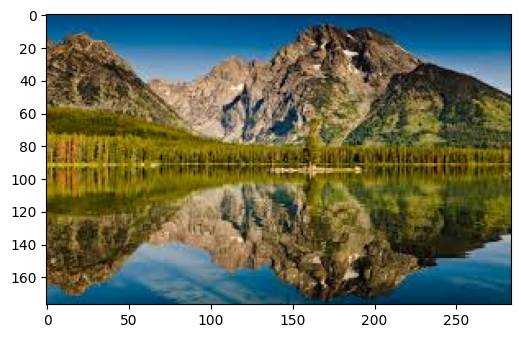

In [ ]:
# Read image
image = plt.imread('data/example.jpeg')

# Plot image
plt.figure(figsize=(6,4))
plt.imshow(image)

### Spatial data

In [ ]:
# Read spatial data
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

# Create choropleth map
m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

# Show map
m

# String formatting in Python

## %-formatting

In [ ]:
# Example (1):
name = "Eric"
print("Hello, %s." % name)

# Example (2):
name = "Eric"
age = 74
print("Hello, %s. You are %s." % (name, age))

# Example (3):
s1 = "Peter"
s2 = "Mary"
s3 = "%s and %s are living together." % (s1, s2)
s4 = "{} and {} are living together.".format(s1, s2)
print(s3)
print(s4)

# Example (4):
first_name = "Eric"
last_name = "Idle"
age = 74
profession = "comedian"
affiliation = "Monty Python"
print("Hello, %s %s. You are %s. You are a %s. You were a member of %s." %
      (first_name, last_name, age, profession, affiliation))

Hello, Eric.
Hello, Eric. You are 74.
Peter and Mary are living together.
Peter and Mary are living together.
Hello, Eric Idle. You are 74. You are a comedian. You were a member of Monty Python.


## str.format()

In [ ]:
# Example (1):
name = 'Peter'
age = 45
print("Hello, {}. You are {}.".format(name, age))

# Example (2):
print("Hello, {1}. You are {0}.".format(age, name))

# Example (3):
person = {'name': 'Peter', 'age': 45}
print("Hello, {name}. You are {age}.".format(
    name=person['name'], age=person['age']))

# Example (4):
person = {'name': 'Eric', 'age': 74}
print("Hello, {name}. You are {age}.".format(**person))

# Example (5):
first_name = "Eric"
last_name = "Idle"
age = 74
profession = "comedian"
affiliation = "Monty Python"
print(("Hello, {first_name} {last_name}. You are {age}. " +
       "You are a {profession}. You were a member of {affiliation}.")
      .format(first_name=first_name, last_name=last_name, age=age,
              profession=profession, affiliation=affiliation))

Hello, Peter. You are 45.
Hello, Peter. You are 45.
Hello, Peter. You are 45.
Hello, Eric. You are 74.
Hello, Eric Idle. You are 74. You are a comedian. You were a member of Monty Python.


#### In order to print the format use the syntax: print("{:.2f}".format(3.1415926))

<table class="wp-block-table code" align="left">
    <tbody>
        <tr>
            <th width="16%">Number</th>
            <th width="16%">Format</th>
            <th width="16%">Output</th>
            <th>Description</th>
        </tr>
        <tr>
            <td>3.1415926</td>
            <td>{:.2f}</td>
            <td>3.14</td>
            <td>Format float 2 decimal places</td>
        </tr>
        <tr>
            <td>3.1415926</td>
            <td>{:+.2f}</td>
            <td>+3.14</td>
            <td>Format float 2 decimal places with sign</td>
        </tr>
        <tr>
            <td>-1</td>
            <td>{:+.2f}</td>
            <td>-1.00</td>
            <td>Format float 2 decimal places with sign</td>
        </tr>
        <tr>
            <td>2.71828</td>
            <td>{:.0f}</td>
            <td>3</td>
            <td>Format float with no decimal places</td>
        </tr>
        <tr>
            <td>5</td>
            <td>{:0&gt;2d}</td>
            <td>05</td>
            <td>Pad number with zeros (left padding, width 2)</td>
        </tr>
        <tr>
            <td>5</td>
            <td>{:x&lt;4d}</td>
            <td>5xxx</td>
            <td>Pad number with x’s (right padding, width 4)</td>
        </tr>
        <tr>
            <td>10</td>
            <td>{:x&lt;4d}</td>
            <td>10xx</td>
            <td>Pad number with x’s (right padding, width 4)</td>
        </tr>
        <tr>
            <td>1000000</td>
            <td>{:,}</td>
            <td>1,000,000</td>
            <td>Number format with comma separator</td>
        </tr>
        <tr>
            <td>0.25</td>
            <td>{:.2%}</td>
            <td>25.00%</td>
            <td>Format percentage</td>
        </tr>
        <tr>
            <td>1000000000</td>
            <td>{:.2e}</td>
            <td>1.00e+09</td>
            <td>Exponent notation</td>
        </tr>
        <tr>
            <td>13</td>
            <td>{:10d}</td>
            <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;13</td>
            <td>Right aligned (default, width 10)</td>
        </tr>
        <tr>
            <td>13</td>
            <td>{:&lt;10d}</td>
            <td>13</td>
            <td>Left aligned (width 10)</td>
        </tr>
        <tr>
            <td>13</td>
            <td>{:^10d}</td>
            <td>&nbsp;&nbsp;&nbsp;&nbsp;13</td>
            <td>Center aligned (width 10)</td>
        </tr>
    </tbody>
</table>

In [ ]:
# Examples of number formatting with str.format()
print("{:.2f}".format(3.1415926))

print("{:.2%}".format(0.25))

print("{:0>8d}".format(42))

print("{:,}".format(1000000000))

print("{:.2e}".format(1000000000))

3.14
25.00%
00000042
1,000,000,000
1.00e+09


## f-strings

In [ ]:
# Example (1):
name = "Eric"
age = 74
print(f"Hello, {name}. You are {age}.")

# Example (2):
print(F"Hello, {name}. You are {age}.")

# Example (3):
print(f"The result is: {15 * 15 / 10}")

# Example (4):
print(f"{name.lower()} is funny.")

# Example 4:
name = "Eric"
profession = "comedian"
affiliation = "Monty Python"
message = (f"Hi {name}. "
           f"You are a {profession}. "
           f"You were in {affiliation}.")
print(message)

Hello, Eric. You are 74.
Hello, Eric. You are 74.
The result is: 22.5
eric is funny.
Hi Eric. You are a comedian. You were in Monty Python.


#### Floating point values have the f suffix. We can also specify the precision: the number of decimal places. The precision is a value that goes right after the dot character.

In [ ]:
# Format floats
pi = 3.1415926535897932384626433832795028841971693993751058209749445923078164062

# No specified format
print(f'{pi}')

# Zero decimal places
print(f'{pi:.0f}')

# Eight decimal places
print(f'{pi:.8f}')

# Two decimal places
print(f'{pi*10000:.2f}')

3.141592653589793
3
3.14159265
31415.93


#### The width specifier sets the width of the value. The value may be filled with spaces or other characters if the value is shorter than the specified width.

In [ ]:
# Format width
for x in range(1, 11):
    print(f'{x:2} | {x**2:3} | {x**5:6}')
    
# Format width and with and decimals
print('\n')
for x in range(1, 11):
    print(f'{x:5.2f} | {x**2:6.2f} | {x**5:9.2f}')

 1 |   1 |      1
 2 |   4 |     32
 3 |   9 |    243
 4 |  16 |   1024
 5 |  25 |   3125
 6 |  36 |   7776
 7 |  49 |  16807
 8 |  64 |  32768
 9 |  81 |  59049
10 | 100 | 100000


 1.00 |   1.00 |      1.00
 2.00 |   4.00 |     32.00
 3.00 |   9.00 |    243.00
 4.00 |  16.00 |   1024.00
 5.00 |  25.00 |   3125.00
 6.00 |  36.00 |   7776.00
 7.00 |  49.00 |  16807.00
 8.00 |  64.00 |  32768.00
 9.00 |  81.00 |  59049.00
10.00 | 100.00 | 100000.00


#### By default, the strings are justified to the left. We can use the > character to justify the strings to the right. The > character follows the colon character.

In [ ]:
# Justify string
s1 = '123'
s2 = '1234'
s3 = '12345'
s4 = '123456'

print(f'{s1:>10}')
print(f'{s2:>10}')
print(f'{s3:>10}')
print(f'{s4:>10}')

       123
      1234
     12345
    123456


#### The example displays a formatted current datetime. The datetime format specifiers follow the : character.

In [ ]:
# Format_datetime
import datetime

now = datetime.datetime.now()
print(f'{now:%Y-%m-%d %H:%M:%S}')

2025-11-07 15:32:47


#### Numbers can have various numeric notations, such as decadic or hexadecimal.

In [ ]:
# Numeric notations
a = 300

# hexadecimal
print(f"{a:x}")

# octal
print(f"{a:o}")

# scientific
print(f"{a:e}")

12c
454
3.000000e+02


# Basic date types in Python

In [ ]:
# Use the dir() function to get a list containing all objects a module.
print(dir(datetime))

['MAXYEAR', 'MINYEAR', 'UTC', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'time', 'timedelta', 'timezone', 'tzinfo']


### Date object to represent a date

In [ ]:
from datetime import date

# Date object to represent a date
a = date(2022, 3, 7)
print(a)

# Get current date
today = date.today()
print("Current date =", today)

2022-03-07
Current date = 2025-11-07


### Time object to represent a time

In [ ]:
from datetime import time

# time(hour = 0, minute = 0, second = 0)
a = time()
print("a =", a)

# time(hour, minute and second)
c = time(hour = 11, minute = 34, second = 56)
print("c =", c)

# time(hour, minute and second)
b = time(11, 34, 56)
print("b =", b)

a = 00:00:00
c = 11:34:56
b = 11:34:56


### Datetime object to represent a datetime

In [ ]:
from datetime import datetime

# datetime(year, month, day)
a = datetime(2022, 12, 31)
print(a)

# datetime(year, month, day, hour, minute, second)
b = datetime(2022, 12, 31, 23, 59, 59)
print(b)

2022-12-31 00:00:00
2022-12-31 23:59:59


### Timedelta object

In [ ]:
from datetime import datetime

# Using date objects to calculate the time delta
t1 = date(year = 1984, month = 12, day = 31)
t2 = date(year = 2022, month = 12, day = 31)
t3 = t2 - t1
print(t3)
print("type of t3 =", type(t3))

# Using datetime objects to calculate the time delta
t4 = datetime(year = 1984, month = 12, day = 31, hour = 12)
t5 = datetime(year = 2022, month = 12, day = 31, hour = 4)
t6 = t5 - t4
print(t6)
print("type of t6 =", type(t6))

13879 days, 0:00:00
type of t3 = <class 'datetime.timedelta'>
13878 days, 16:00:00
type of t6 = <class 'datetime.timedelta'>


### Format datetime using strftime()

In [ ]:
from datetime import datetime

# Current date and time
now = datetime.now()

# H:M:S format
t = now.strftime("%H:%M:%S")
print("time:", t)

# mm/dd/YY H:M:S format
s1 = now.strftime("%m/%d/%Y, %H:%M:%S")
print("s1:", s1)

# dd/mm/YY H:M:S format
s2 = now.strftime("%d/%m/%Y, %H:%M:%S")
print("s2:", s2)

time: 15:32:47
s1: 11/07/2025, 15:32:47
s2: 07/11/2025, 15:32:47


### Handling time zone

In [ ]:
from datetime import datetime

# Local time
local = datetime.now()
print("Local:", local.strftime("%m/%d/%Y, %H:%M:%S"))

# NY time
tz_NY = pytz.timezone('America/New_York')
datetime_NY = datetime.now(tz_NY)
print("New York:", datetime_NY.strftime("%m/%d/%Y, %H:%M:%S"))

Local: 11/07/2025, 15:32:47
New York: 11/07/2025, 09:32:47


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-87-generic
Datetime: 2025-11-07 15:32:47
Python Version: 3.12.12
-----------------------------------
